In [1]:
import numpy as np
import pandas as pd

In [ ]:
## A Company is having its offices across all locations of India. These locations are categorized with respect to zones. 
## The company has decided to give medical expenditure benefits to their employees. 
## The company has collected the medical expenditure of all the employees for the year 2019
## The company also collected some other health and family related data of all employees like number of dependents,
## age, bmi, smoking and alcoholic habits.
## Answer the following questions to provide insight into the collected dat.

In [ ]:
##  Read the dataset and do primary study of data. Perform following steps:  
## a. Reading some rows of dataset
## b. Learn data types of all features
## c. See the statistical properties of the data.

In [2]:
data = pd.read_csv("emp_health.csv")

In [3]:
data.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [4]:
data.columns

Index(['id', 'age', 'sex', 'bmi', 'dependent', 'alcohol', 'smoke', 'zone',
       'expenditure'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
id             1338 non-null object
age            1338 non-null int64
sex            1338 non-null object
bmi            1338 non-null float64
dependent      1338 non-null int64
alcohol        1338 non-null object
smoke          1338 non-null object
zone           1338 non-null object
expenditure    1338 non-null float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [6]:
data.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.describe(include='all')

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
count,1338,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338,1338.000000
unique,1338,NaN,2,NaN,NaN,5,2,8,NaN
top,i11054,NaN,male,NaN,NaN,daily,no,east,NaN
freq,1,NaN,676,NaN,NaN,395,1064,262,NaN
mean,NaN,39.207025,NaN,30.663397,1.094918,NaN,NaN,NaN,13270.422265
std,NaN,14.049960,NaN,6.098187,1.205493,NaN,NaN,NaN,12110.011237
min,NaN,18.000000,NaN,15.960000,0.000000,NaN,NaN,NaN,1121.873900
25%,NaN,27.000000,NaN,26.296250,0.000000,NaN,NaN,NaN,4740.287150
50%,NaN,39.000000,NaN,30.400000,1.000000,NaN,NaN,NaN,9382.033000
75%,NaN,51.000000,NaN,34.693750,2.000000,NaN,NaN,NaN,16639.912515


In [8]:
# 1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [9]:
data_50 = data[data['age']>50]
data_50_smoke = data_50[data_50['smoke']=='yes']
data_50_smoke['smoke'].value_counts()

yes    64
Name: smoke, dtype: int64

In [10]:
data_50_smoke['expenditure'].mean()

38820.22308234375

In [11]:
## 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees? 

In [12]:
data_female= data[data['sex']=='female']
no_alcohol_female = data_female[data_female['alcohol']!='daily']['alcohol'].value_counts().sum()
total_female = len(data_female.index)
percentage  = no_alcohol_female /total_female * 100
print("Percentage of no alcohol consumption of female is {0:.2f}%".format(percentage))

Percentage of no alcohol consumption of female is 68.43%


In [13]:
## 3. Display zone wise average expenditure of employees on health

In [14]:
data.groupby('zone')['expenditure'].mean()

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

In [15]:
## 4. Employees of which zone did maximum expenditure on health

In [16]:
zone_expenditure = data.groupby('zone')['expenditure'].sum()
zone_expenditure.sort_values(ascending = False).head(1)

zone
east    3.608966e+06
Name: expenditure, dtype: float64

In [17]:
## 5. What is the minimum expenditure done by any employee in organization

In [18]:
min_exp = data.sort_values(by = 'expenditure').head(1)['expenditure']
min_exp

940    1121.8739
Name: expenditure, dtype: float64

In [19]:
min_index= data['expenditure'].idxmin()
min_expenditure = data['expenditure'][min_index]
print("The minimum ependiture is ${0:.2f}".format(min_expenditure))

The minimum ependiture is $1121.87


In [20]:
## 6. What is average expenditure of employees who have 2 or lesser dependents

In [21]:
data_2dependent = data[data['dependent']<=2]
print("Average expenditure for the employees = {0:.2f}".format(data_2dependent['expenditure'].mean()))

Average expenditure for the employees = 13040.97


In [22]:
## 7. How many employees are below age of 20 years. What is their average BMI

In [84]:
data_below20 = data[data['age']<20]
count_below20 = len(data_below20.index)
below_20_exp = data_below20['bmi'].mean()

In [85]:
print("There are {0} employees below 20 years of age and their average medical expenditure is{1:.2f}".format(count_below20,below_20_exp))

There are 137 employees below 20 years of age and their average medical expenditure is29.97


In [25]:
## 8. Create a dataframe "non_smoker" for all non-smoker male employees

In [26]:
non_smoker = data.loc[(data.smoke=='no') & (data.sex=='male')]
non_smoker

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


In [27]:
## 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [28]:
non_alcoholic = data.loc[(data.alcohol=='no') & (data.sex=='male')]
non_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


In [29]:
## 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol
## (Hint:Use join and dataframes created in Q8 and Q9)

In [40]:
data1 = non_smoker[['id','smoke']]
data2 = non_alcoholic[['id','alcohol']]

In [41]:
non_smoking_alcoholic = pd.merge(data1, data2, how = 'inner', on = 'id',validate='many_to_many')
non_smoking_alcoholic

,id,smoke,alcohol
0,i10030,no,no
1,i10036,no,no
2,i10040,no,no
3,i10049,no,no
4,i10079,no,no
...,...,...,...
104,i11273,no,no
105,i11282,no,no
106,i11322,no,no
107,i11332,no,no


In [31]:
## 11.What is the count for each zone with respect to number of dependent

In [32]:
data_zone_dependent =data.groupby(['zone','dependent'])['id'].count()
data_zone_dependent =data_zone_dependent.reset_index()
data_zone_dependent = pd.DataFrame(data_zone_dependent)
data_zone_dependent = data_zone_dependent.rename(columns = {'id':'count'})

In [33]:
data_zone_dependent 

,zone,dependent,count
0,east,0,124
1,east,1,65
2,east,2,42
3,east,3,22
4,east,4,6
5,east,5,3
6,north,0,26
7,north,1,20
8,north,2,10
9,north,3,12


In [ ]:
## 12. Classify the employees into 3 categories.
## Category 1 : employees below 18.5 bmi - underweight
## Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
## Category 3 : employee with bmi over 24.9 - overweight
## What is the average expenditure of employees in each category.
## Display the bar chart for the same

In [103]:
data_underweight = data[data['bmi']<18.5]
bmi_range = [18.5,24.9]
data_fit = data[data['bmi'].isin(bmi_range)]
data_overweight = data[data['bmi']>24.9]

In [105]:
exp1 = data_underweight['expenditure'].mean()
exp1

8852.200585000002

In [106]:
exp2 = data_fit['expenditure'].mean()
exp2

4766.022

In [107]:
exp3 = data_overweight['expenditure'].mean()
exp3

13936.616823466235

In [118]:
exp_list = [exp1,exp2,exp3]
columns1 = ['data_underweight','data_fit','data_overweight']
df = pd.DataFrame(list(zip( columns1,exp_list)),columns = ['bmi_category', 'avg_expenditure'])
df

,bmi_category,avg_expenditure
0,data_underweight,8852.200585
1,data_fit,4766.022000
2,data_overweight,13936.616823


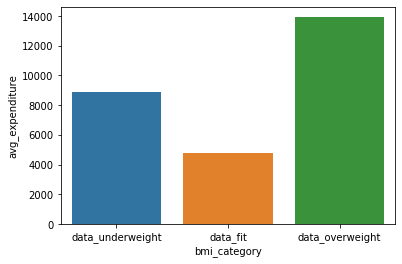

In [119]:
import seaborn as sns
sns.barplot(x='bmi_category',y='avg_expenditure',data = df)

In [ ]:
## 13. Draw line plot of expenditure against age and BMI

In [42]:
import seaborn as sns

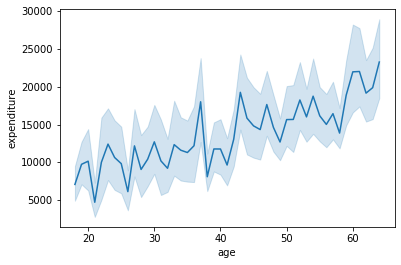

In [49]:
sns.lineplot(data=data, x="age", y="expenditure")

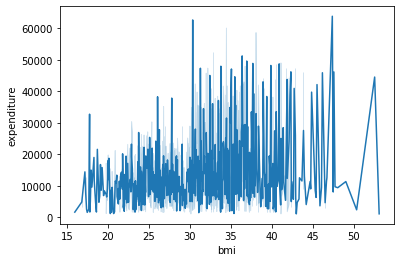

In [48]:
sns.lineplot(data=data, x="bmi", y="expenditure")

In [ ]:
## 14. Draw a bar chart to show zone wise average expenditure

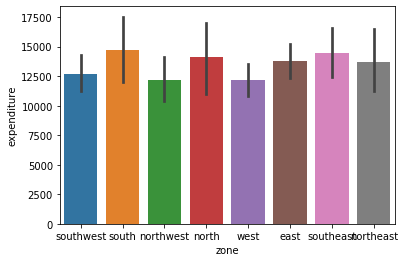

In [51]:
sns.barplot(x='zone',y='expenditure',data = data)

In [ ]:
## 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

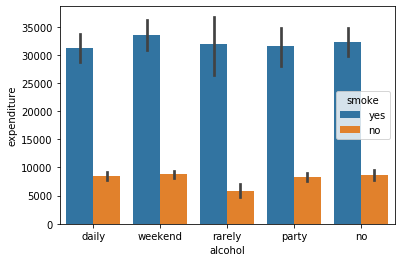

In [53]:
sns.barplot(x='alcohol',y='expenditure',hue = 'smoke',data = data)

In [ ]:
## 16. Draw pie chart for alcohol consumption habits

In [63]:
df=data.groupby(by='alcohol')['id'].count().reindex()
df

alcohol
daily      395
no         259
party      278
rarely      59
weekend    347
Name: id, dtype: int64

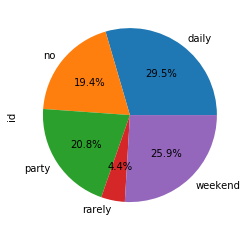

In [67]:
plot=df.plot.pie(x='alcohol',autopct="%.1f%%")

In [ ]:
## 17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

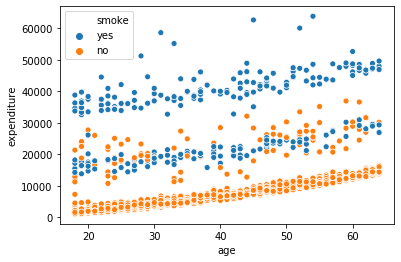

In [72]:
sns.scatterplot(x='age',y='expenditure',data=data,hue='smoke')

In [ ]:
## 18. Draw distribution plot of expenditure

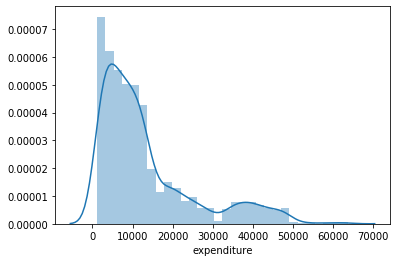

In [83]:
sns.distplot( data['expenditure'],hist=True)

In [ ]:
## 19. Display the pairplot

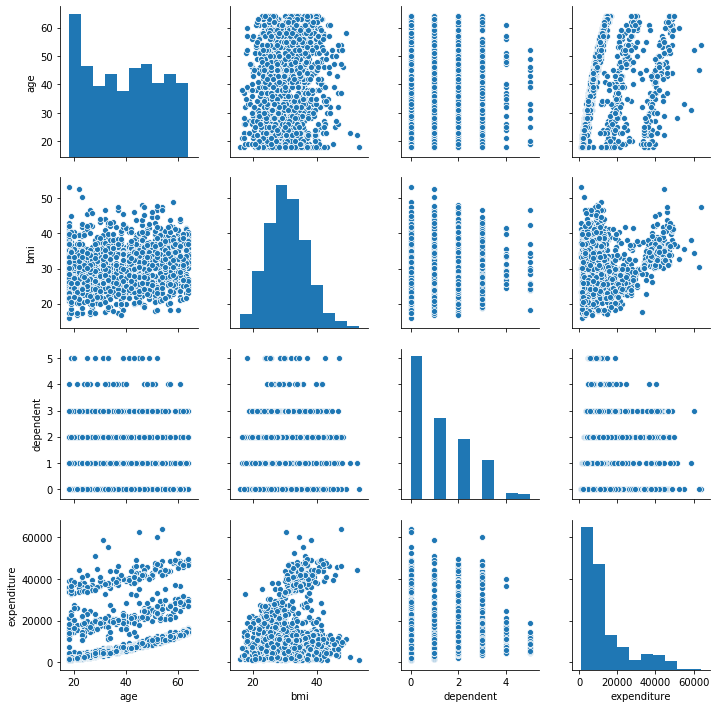

In [86]:
sns.pairplot(data)

In [ ]:
## 20. Display heatmap for the data

In [90]:
mat = data.corr()

In [124]:
sns.set(rc={'figure.figsize':(8.7,6.7)})

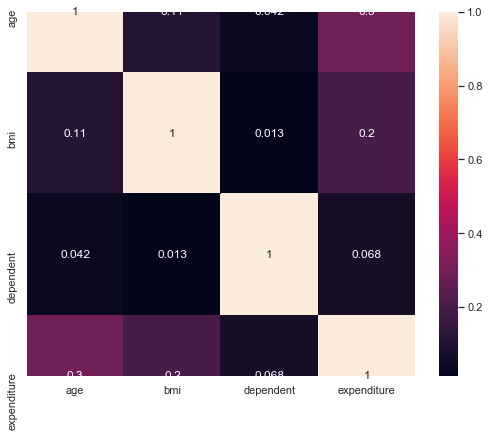

In [125]:
sns.heatmap(mat,annot = True)